In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/ums_viz.csv')
df_perf = pd.read_pickle('descriptions.pkl')
df_perf.columns.values[0] = 'perf_name'

df['perf_name'] = df['perf_name'].apply(lambda x: x.strip())
df_perf['perf_name'] = df_perf['perf_name'].apply(lambda x: x.strip())

df['per_seat'] = df['tck_amt']/df['num_seats']
df_group = df.groupby('perf_name')

# Add a whole bunch of new performance-level features

# mean ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].mean().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'mean_tck_amt', 'num_seats': 'mean_num_seats', 'per_seat': 'mean_per_seat'})

df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# max ticket amount, number of seats, price per seat
df_tmp = df_group['tck_amt', 'num_seats', 'per_seat'].max().reset_index()
df_tmp = df_tmp.rename(columns = {'tck_amt': 'max_tck_amt', 'num_seats': 'max_num_seats', 'per_seat': 'max_per_seat'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

# total number of seats
df_tmp = df_group['num_seats'].count().reset_index()
df_tmp = df_tmp.rename(columns = {'num_seats': 'count_tck_amt'})
df_perf = pd.merge(df_perf, df_tmp, on='perf_name')

print df_perf

                perf_name                                        description  \
0     The Infernal Comedy  John Malkovich makes his UMS debut portraying ...   
1        Yuja Wang, piano  Chinese pianist Yuja Wang combines the spontan...   
2     London Philharmonic  The London Philharmonic returns for its first ...   
3        Hamburg Symphony  In 1971, French composer Olivier Messiaen was ...   
4    Chicago Symphony Orc  Wind players of the Chicago Symphony come toge...   
5    San Francisco Sympho  Michael Tilson Thomas and the San Francisco Sy...   
6      Pavel Haas Quartet  “The world’s most exciting string quartet? Wel...   
7        Ballet Preljocaj  Few audience members in attendance at Ballet P...   
8             Joshua Bell  Often referred to as a “poet of the violin,” J...   
9          Murray Perahia  In the more than 35 years he has been performi...   
10    Mariinsky Orchestra  The Mariinsky Orchestra and Valery Gergiev ret...   
11   Detroit Symphony Orc  A concert cre

c:\Users\Xinyu\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [67]:
# Extract bigram matrix
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

vect = CountVectorizer(ngram_range=(1, 1), stop_words = ENGLISH_STOP_WORDS, min_df = 5)
X = vect.fit_transform(df_perf.description.values)

print X.shape

(143, 446)


In [73]:
# Latent Dirichlet Allocation

from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=5, max_iter=10)
y = lda.fit_transform(X)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print

print_top_words(lda, vect.get_feature_names(), 20)

df_perf['topic'] = np.argmax(y, 1)

Topic #0:
performance dance ums ballet music set 2013 best year office new michigan james audience work album white guardian small created
Topic #1:
new york voice music times performed century heart dance contemporary musical singer known william program year legendary thing percussion traditions
Topic #2:
theatre national london theater michigan director partnership play broadcasts high company presented new definition time ballet award winning world shakespeare
Topic #3:
music ums american concert composers hall quartet chamber symphony orchestra new features musical performances concerts john string francisco san audiences
Topic #4:
music jazz center new arbor ann performance dance art michigan musical lincoln band classical young school orchestra including world create



In [74]:
df_perf.groupby('topic').describe()

count_tck_amt  max_num_seats  max_per_seat   max_tck_amt  \
topic                                                                   
0     count      12.000000      12.000000     12.000000     12.000000   
      mean     1080.083333      19.583333     54.750000    498.416667   
      std       815.050077      14.170766     23.545411    282.877249   
      min        22.000000       3.000000      0.000000      0.000000   
      25%       434.250000       9.500000     47.000000    342.500000   
      50%       959.500000      14.000000     55.000000    430.000000   
      75%      1562.500000      26.750000     62.500000    730.000000   
      max      2977.000000      45.000000    100.000000   1000.000000   
1     count      16.000000      16.000000     16.000000     16.000000   
      mean      564.187500      30.125000     43.437500   1009.818750   
      std       577.586960      33.822823     18.529144   1415.612555   
      min        17.000000       4.000000      0.000000      0.000000   
      25%       162.250000       9.000000     38.750000    281.000000   
      50%       401.500000      20.000000     47.000000    556.550000   
      75%       752.500000      32.750000     55.500000   1090.500000   
      max      2275.000000     131.000000     70.000000   5567.500000   
2     count      25.000000      25.000000     25.000000     25.000000   
      mean      282.480000      14.000000     28.400000    271.792000   
      std       287.024842      12.553220     12.922848    257.792549   
      min        22.000000       4.000000     12.000000     72.000000   
      25%        82.000000       6.000000     22.000000    110.000000   
      50%       145.000000      10.000000     22.000000    176.000000   
      75%       438.000000      20.000000     22.000000    264.000000   
      max      1041.000000      51.000000     60.000000   1020.000000   
3     count      47.000000      47.000000     47.000000     47.000000   
      mean      923.340426      21.936170     57.085106    670.855319   
      std      1063.899805      17.691074     16.582901    688.447151   
      min        35.000000       4.000000     35.000000    160.000000   
      25%       378.000000       8.000000     46.000000    262.000000   
      50%       533.000000      17.000000     50.000000    490.000000   
      75%      1193.500000      29.000000     67.500000    756.250000   
      max      5540.000000      93.000000    100.000000   3952.500000   
4     count      43.000000      43.000000     43.000000     43.000000   
      mean      750.813953      45.000000     75.325581   1409.774419   
      std       545.955225      67.754107    146.292063   2481.324350   
      min       116.000000       5.000000     16.000000     80.000000   
      25%       376.000000      14.500000     44.000000    328.000000   
      50%       688.000000      20.000000     48.000000    596.700000   
      75%       967.000000      37.000000     56.000000   1274.000000   
      max      3151.000000     392.000000   1000.000000  14960.000000   

             mean_num_seats  mean_per_seat  mean_tck_amt  
topic                                                     
0     count       12.000000      12.000000     12.000000  
      mean         1.913267      31.535034     61.091238  
      std          0.142326      11.895349     23.529688  
      min          1.590909       0.000000      0.000000  
      25%          1.854081      28.724907     58.839118  
      50%          1.941282      32.628314     61.827320  
      75%          2.008495      36.022222     69.831135  
      max          2.093101      52.261669    105.120187  
1     count       16.000000      16.000000     16.000000  
      mean         2.060243      26.767284     55.217135  
      std          0.213010       9.169032     18.353504  
      min          1.797927       0.000000      0.000000  
      25%          1.874889      25.022311     50.480146  
      50%          2.052489      29.103667     58.619391  
  

## Plots

### Distribution of the number of performances for each topic

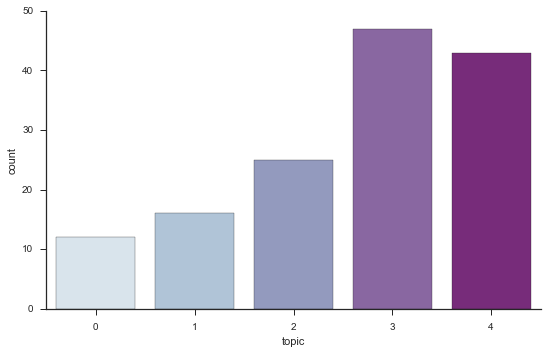

In [75]:
import seaborn as sns
topic_range = range(5)
sns.factorplot(x = 'topic', data = df_perf, kind = 'count', palette="BuPu", size=5, aspect=1.5, order = topic_range)

### Mean ticket amount per seat for each topic

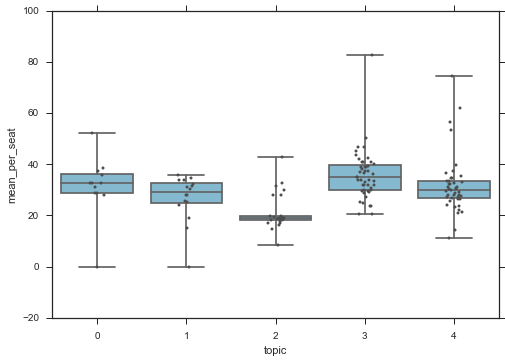

In [76]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="topic", y="mean_per_seat", data=df_perf, whis=np.inf, color="c", order=topic_range)
sns.stripplot(x="topic", y="mean_per_seat", data=df_perf, jitter=True, size=3, color=".3", linewidth=0, order=topic_range)

### Max ticket amount per seat for each topic

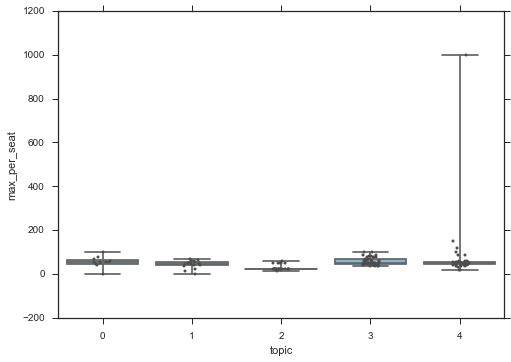

In [77]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="topic", y="max_per_seat", data=df_perf, whis=np.inf, color="c", order=topic_range)
sns.stripplot(x="topic", y="max_per_seat", data=df_perf, jitter=True, size=3, color=".3", linewidth=0, order=topic_range)

### Ticket amount per seat for each topic

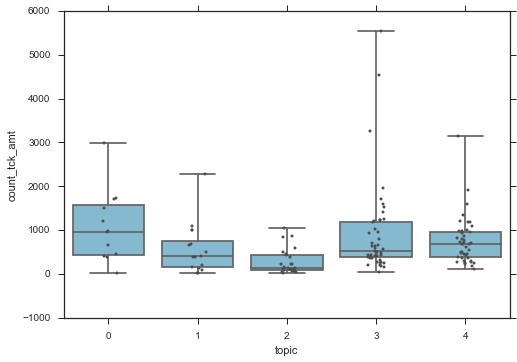

In [78]:
sns.set(style="ticks", palette="muted", color_codes=True)
ax = sns.boxplot(x="topic", y="count_tck_amt", data=df_perf, whis=np.inf, color="c", order=topic_range)
sns.stripplot(x="topic", y="count_tck_amt", data=df_perf, jitter=True, size=3, color=".3", linewidth=0, order=topic_range)

In [12]:
df_perf.head()

,perf_name,description,mean_tck_amt,mean_num_seats,mean_per_seat,max_tck_amt,max_num_seats,max_per_seat,count_tck_amt,topic
0,The Infernal Comedy,John Malkovich makes his UMS debut portraying ...,72.092196,1.997354,37.194444,595.0,14,75.0,1512,2
1,"Yuja Wang, piano",Chinese pianist Yuja Wang combines the spontan...,63.171001,2.003096,32.884830,460.0,23,56.0,969,4
2,London Philharmonic,The London Philharmonic returns for its first ...,77.771242,1.937255,40.968301,1000.0,50,80.0,1530,2
3,Hamburg Symphony,"In 1971, French composer Olivier Messiaen was ...",62.176976,1.838933,34.027619,487.5,17,65.0,1012,2
4,Chicago Symphony Orc,Wind players of the Chicago Symphony come toge...,110.584576,1.914630,56.604253,14960.0,187,120.0,3151,2
